In [1]:
import optforge as of
from optforge.benchmarks.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.core.problem import ElementwiseProblem

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

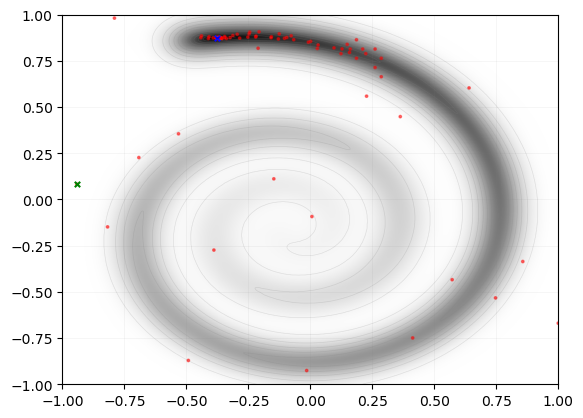

1001


In [9]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

class Objective(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_ieq_constr=0, xl=-1, xu=1)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = vob.step_noline(x)

problem = Objective()
algorithm = NelderMead()
algorithm.setup(problem, seed=0)

while vob.current_step < 1000:
    algorithm.next()
vob.plot()
print(vob.current_step)

evals: 1000/1000 | best value: 0.0196                            
Job finished in 0.9s., did 1000 evaluations.


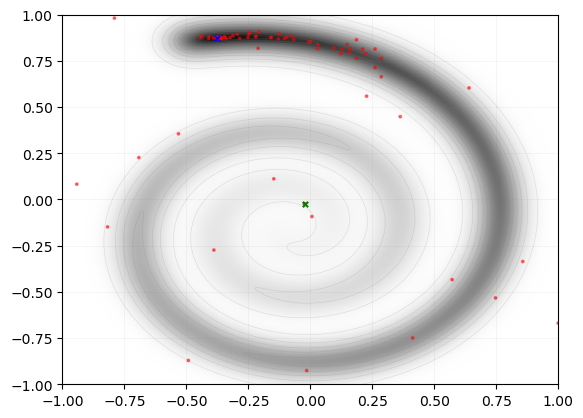

In [2]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.PymooOptimizer(NelderMead(), seed = 0)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1),
)

vob.plot()